In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-shotlog-16-17/NBA shotlog_16_17.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualizing sports data: basketball

In this notebook we're going to look at ways of visualizing performance in basketball. 

Our analysis here is going to focus on the where the ball was thrown from, which is recorded using (x, y) co-ordinates. This data is  easy to graph and illuminating. 

We choose three different ways to look at the data

1. shot outcome: scored, missed or blocked
2. shot types by player
3. narrowing the focus to a particular region of the court

In [2]:

shot = pd.read_csv("../input/nba-shotlog-16-17/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [9]:
shot.head()

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome
0,NaN,SF,Yes,97.0,SCORED,ATL,Pullup Jump Shot,2,WAS,405.0,1:09,10/27/2016,Kent Bazemore,NaN,1,MISSED
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED
2,SCORED,SG,Yes,239.0,MISSED,ATL,Jump Shot,2,WAS,223.0,1:41,10/27/2016,Kyle Korver,30.0,1,SCORED
3,SCORED,PG,Yes,102.0,SCORED,ATL,Pullup Jump Shot,2,WAS,385.0,2:16,10/27/2016,Dennis Schroder,35.0,1,SCORED
4,SCORED,PF,Yes,128.0,MISSED,ATL,Turnaround Jump Shot,2,WAS,265.0,2:40,10/27/2016,Paul Millsap,24.0,1,MISSED


From the print() command we have a good deal of information on each shot, including the name of the player, the type of shot, team names, time in the game and so on. From the .describe() we can see that there are over 210,000 shots in the data although there is a small number of shots with missing coordinates (around 400). Also note that the x-axis location variable (this is the sideline) ranges from 0 to 993, while the y-axis variable (this is the baseline) runs from 0 to 500.

We can generate a simple plot as follows:

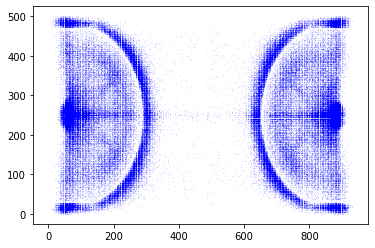

In [7]:
x = shot['location_x']
y = shot['location_y']
plt.scatter(x,y, s=.005,c='b', marker= '.')

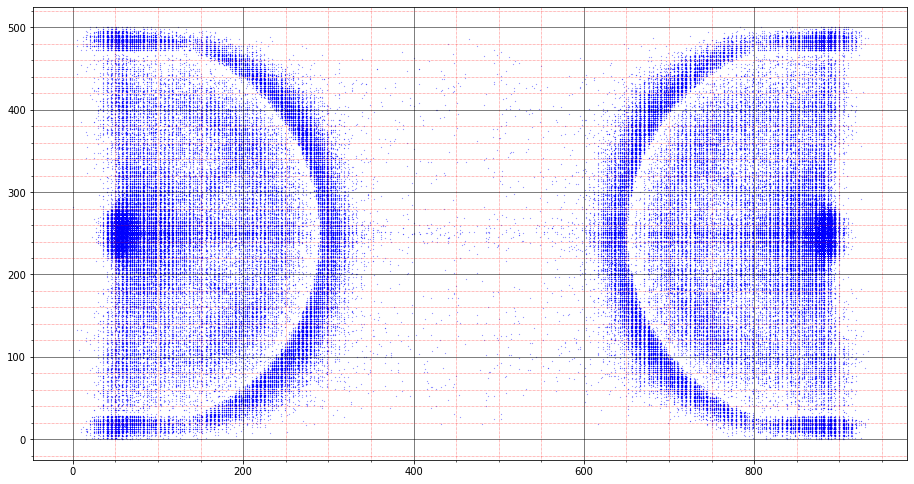

In [8]:
# A simple plot of coordinates, scaled for court dimensions and with grid added.

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='b', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

One point to note about the data is that it does not include free throws - otherwise there would be a deep red concentration at the center of the free throw line.

The plot above gives us a very clear picture of the location of shots, notably from under the basket and from the three point line. However, the plot does not take account of the proportions of the court. Moreover, it would be useful to add a grid to identify more clearly the different locations.

The dimensions of the court defined by the NBA are 94 feet by 50 feet. We can specify that ratio using figsize = (a,b). Note that we can also scale this to control the size of the plot in our window (we divide both the x and y figsize by 6)

Rather than look at both ends of the court, we can just look at one half of the court by fixing the range of the x axis using plt.xlim, which we set to cover the right hand half court. 
Note that to maintain the same dimensions we also need to halve the x axis on figsize (to 94/12 rather than 94/6)

(466.5, 933.0)

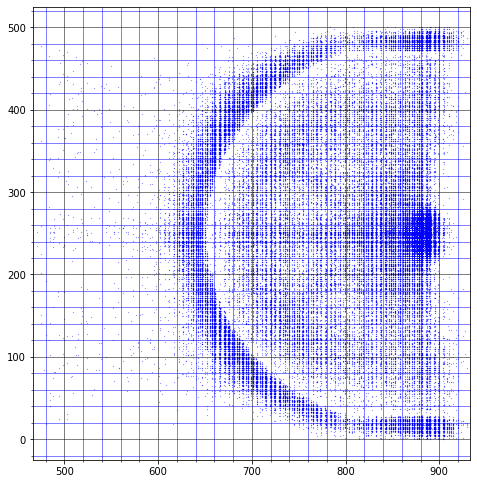

In [10]:
plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='b', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.5', color='blue')
plt.xlim(933/2, 933)

The last plot just shows us one half of the court. To include both halves but show only the half court, we can convert the coordinates from the left hand half court so that they have the same relative location on the right hand half court (of course, there should be no real difference in performance based on which end of the court the player is attacking, and the two halves are mirror images of each other).

We can convert the plot to show shots from both ends on a half court if we adjust the coordinates. The x-axis runs from 0 to 933, so if we want to just show the right hand half court with all shots, we can recode the location_x variables, where x is less the 933/2 (the left had half court) as equal to "933 - location_x". This produces a mirror image of the x coordinate in the right hand half of the court. However, since the direction toward the basket is the reverse of the other half court, we need to take the mirror image of the y coordinate for shots in the left had half court - that is "500 - location_y"

In [11]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Text(0.5, 1.0, 'Shots')

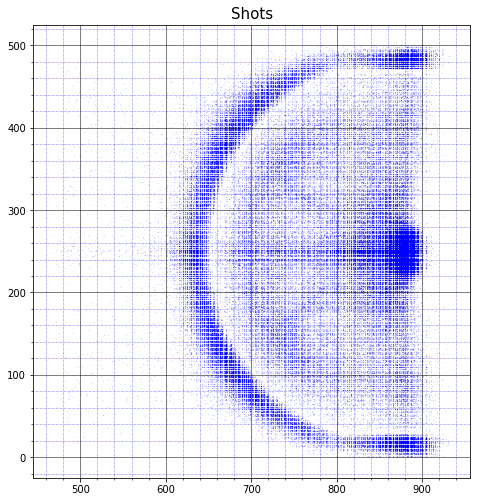

In [12]:
# all shots shown on a half court

hx = shot['halfcourt_x']
hy = shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01,c='b', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.title("Shots", fontsize = 15)

In [13]:
# Comparing players

# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
...,...,...,...,...,...
111,Demetrius Jackson,4,2,SCORED,3
203,Jarrett Jack,3,2,SCORED,2
38,Ben Bentil,3,1,MISSED,3
202,Jarnell Stokes,1,1,SCORED,1


We now breakdown shots into three categories: scored, missed and blocked. To do this we simply create subsets of the shot df based on shot outcome.

Text(0.5, 1.0, 'Scored')

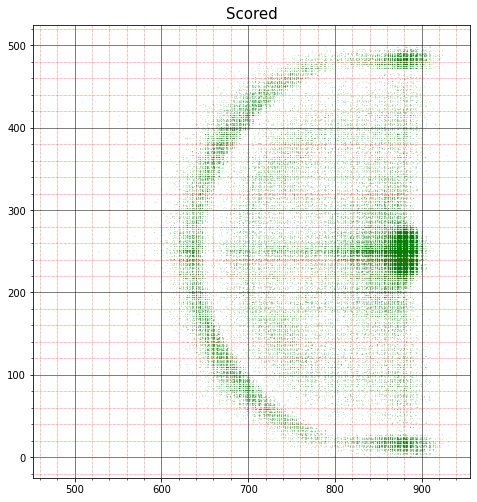

In [16]:
# Scoring shots

Scored = shot[shot.current_shot_outcome == 'SCORED']
hxs = Scored['halfcourt_x']
hys = Scored['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxs,hys, s=.01,c='g', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Scored", fontsize = 15)

Text(0.5, 1.0, 'Missed')

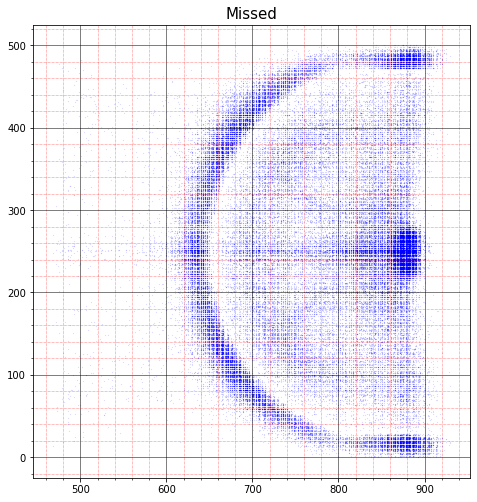

In [14]:
# Missed Shots

Missed = shot[shot.current_shot_outcome == 'MISSED']

hxm = Missed['halfcourt_x']
hym = Missed['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxm,hym, s=.01,c='b', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Missed", fontsize = 15)

Text(0.5, 1.0, 'Blocked')

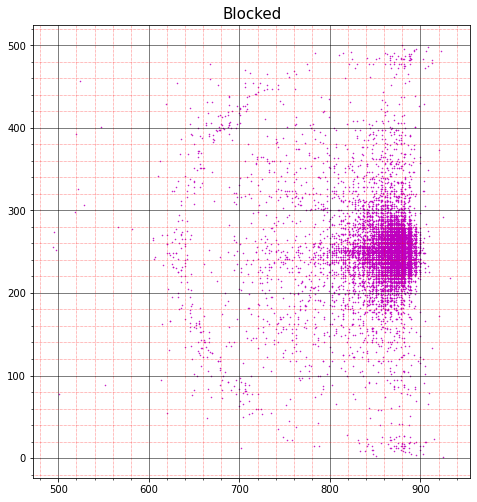

In [15]:
# Blocked shots

Blocked = shot[shot.current_shot_outcome == 'BLOCKED']

hxb = Blocked['halfcourt_x']
hyb = Blocked['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxb,hyb, s=1,c='m', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Blocked", fontsize = 15)

While informative, the location of shots by shot type is not that surprising. There has been a lot of interest in recent years in the rise of the 3-point shot with evidence suggesting that in the past there were more more shots from distance inside the three-point line, and that these have tended to die out since the payoff is much lower than a shot from just outside the three-point. We don't have past data here to make the comparison.

Probably the greatest interest lies in comparing individual players. We can do this easily by taking subsets as we did above.

Text(0.5, 1.0, 'LeBron James')

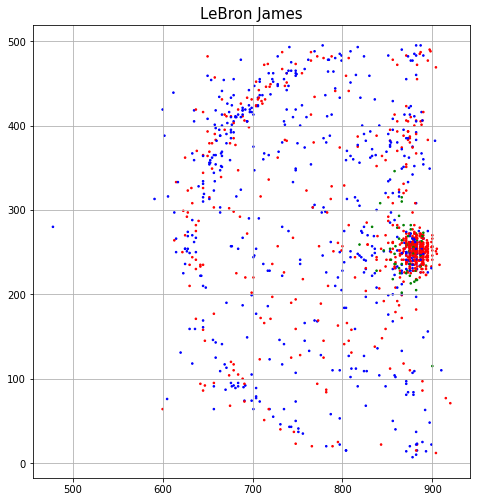

In [17]:
LeBron = shot[shot['shoot_player']=='LeBron James']
hxL = LeBron['halfcourt_x']
hyL = LeBron['halfcourt_y']
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

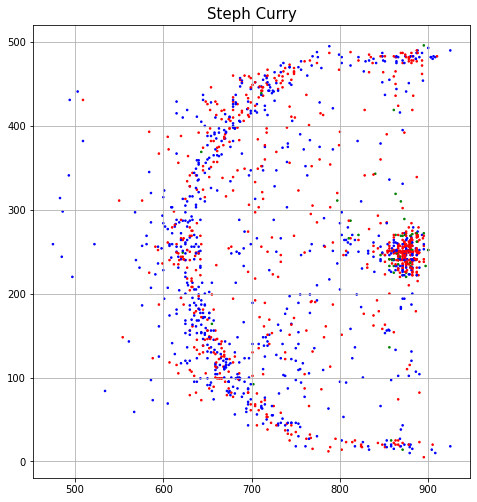

In [18]:
Curry = shot[shot['shoot_player']=='Stephen Curry']
hxC = Curry['halfcourt_x']
hyC = Curry['halfcourt_y']
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

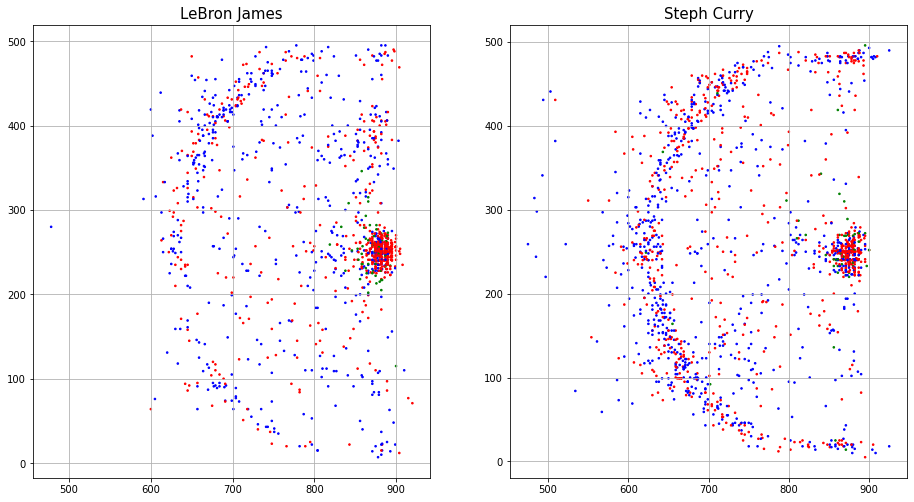

In [20]:
# LeBron James and Steph Curry side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)# LeBron James and Steph Curry side by side



These simple plots make clear some of the differences between the two players. It is clearly visible that Curry shoots more from the three-point line than LeBron, while LeBron is more active on the paint. Some more subtle differences are also visible. LeBron is more active on the left hand side of the court, while Curry is equally active on both sides. Curry also shoots more thre-pointers from the corners.

WestBrook Durant Comparision

Text(0.5, 1.0, 'westbrook')

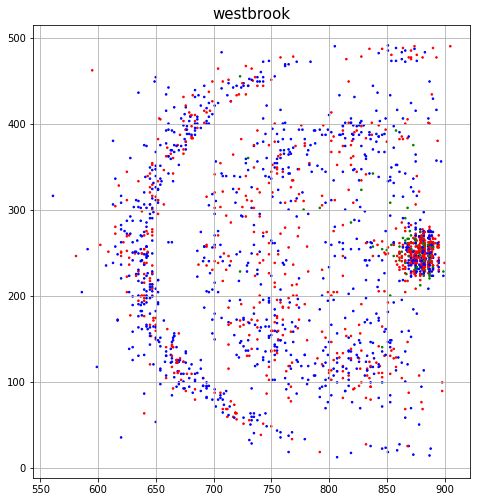

In [21]:
westbrook = shot[shot['shoot_player']=='Russell Westbrook']
hxL = westbrook['halfcourt_x']
hyL = westbrook['halfcourt_y']
colors = np.where(westbrook['current_shot_outcome']=='SCORED','r',np.where(westbrook['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("westbrook", fontsize = 15)

Text(0.5, 1.0, 'Kevin Durant')

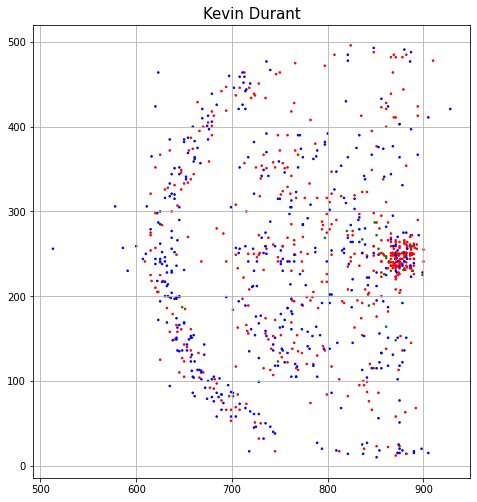

In [22]:

durant = shot[shot['shoot_player']=='Kevin Durant']
hxC = durant['halfcourt_x']
hyC = durant['halfcourt_y']
colors = np.where(durant['current_shot_outcome']=='SCORED','r',np.where(durant['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

(0.0, 500.0)

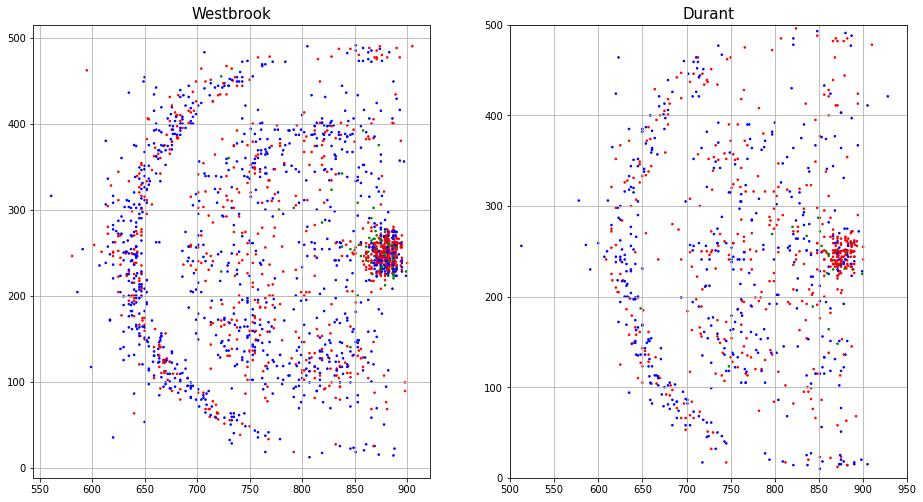

In [23]:
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(westbrook['current_shot_outcome']=='SCORED','r',np.where(westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxL,hyL, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Westbrook", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(durant['current_shot_outcome']=='SCORED','r',np.where(durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxC,hyC, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Durant", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)

This was Westbrooks MVP season .

## Jordan - Howard Comparision

In [24]:
jordan = shot[shot['shoot_player']=='DeAndre Jordan']
howard = shot[shot['shoot_player']=='Dwight Howard']

(0.0, 500.0)

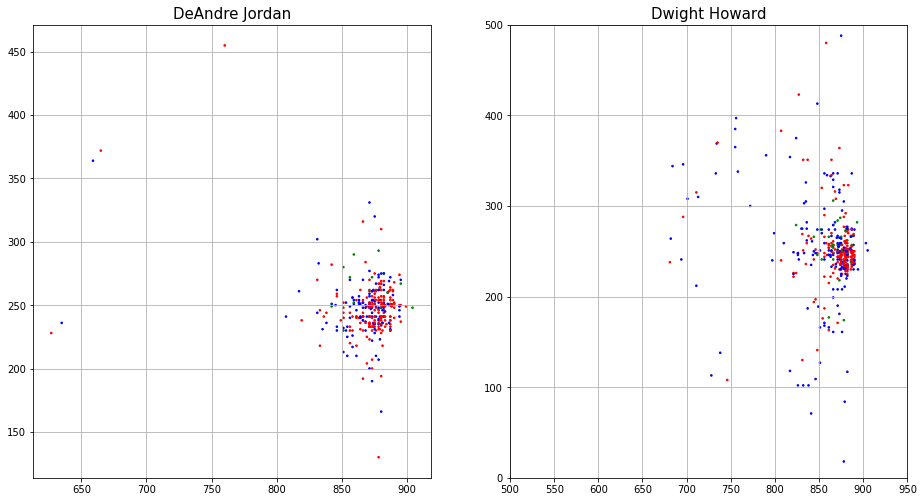

In [25]:
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
hxj = jordan ['halfcourt_x']
hyj = jordan['halfcourt_y']
colors = np.where(jordan['current_shot_outcome']=='SCORED','r',np.where(jordan['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxj,hyj, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("DeAndre Jordan", fontsize = 15)
ax = f.add_subplot(122)
hxh = howard['halfcourt_x']
hyh = howard['halfcourt_y']
colors = np.where(howard['current_shot_outcome']=='SCORED','r',np.where(howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxh,hyh, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Dwight Howard", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)